# Seaborn

## Distribution Plots

In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [4]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### For univariate plots

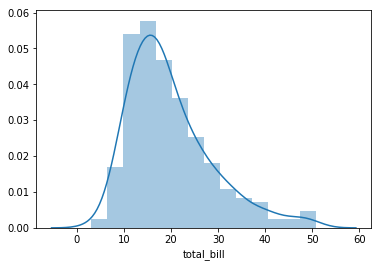

In [7]:
sns.distplot(tips['total_bill'])

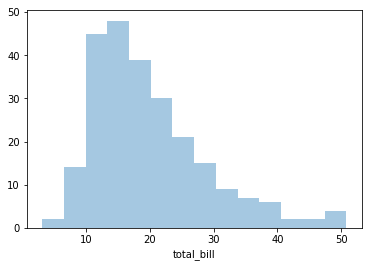

In [8]:
sns.distplot(tips['total_bill'], kde = False)

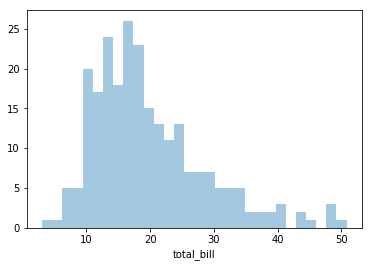

In [10]:
sns.distplot(tips['total_bill'], kde = False, bins=30)

### Jointplot - two variable comparison

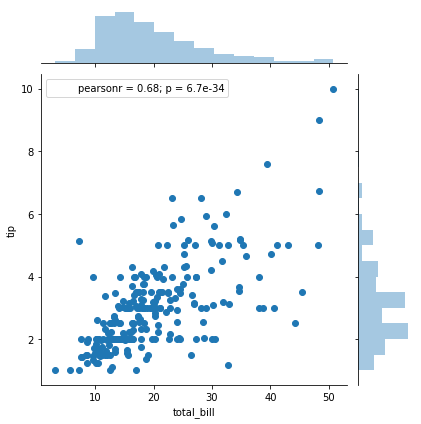

In [11]:
sns.jointplot(x='total_bill',y='tip', data=tips)

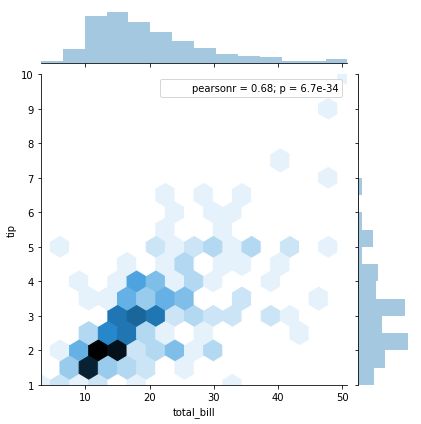

In [12]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex')

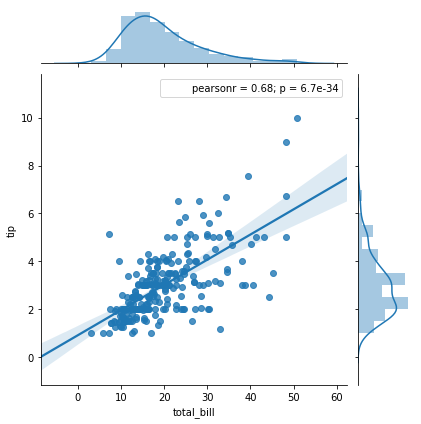

In [14]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg')

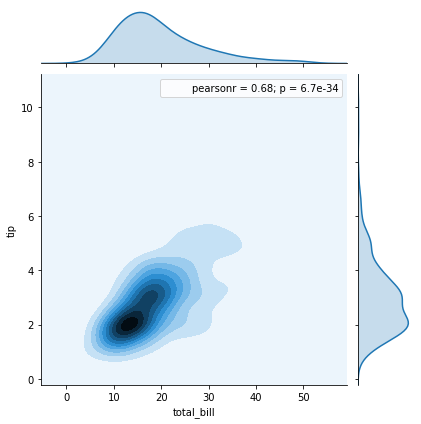

In [15]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='kde')

### Pairplot - comparison of a combination of all variables in the dataframe

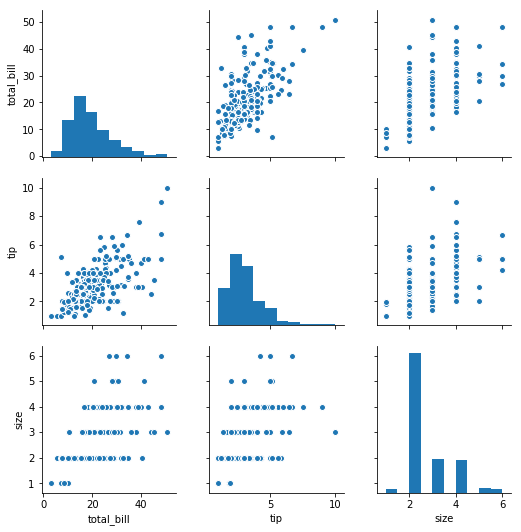

In [16]:
sns.pairplot(tips)

Use a `hue`parameter to color datapoints based on a categorical value

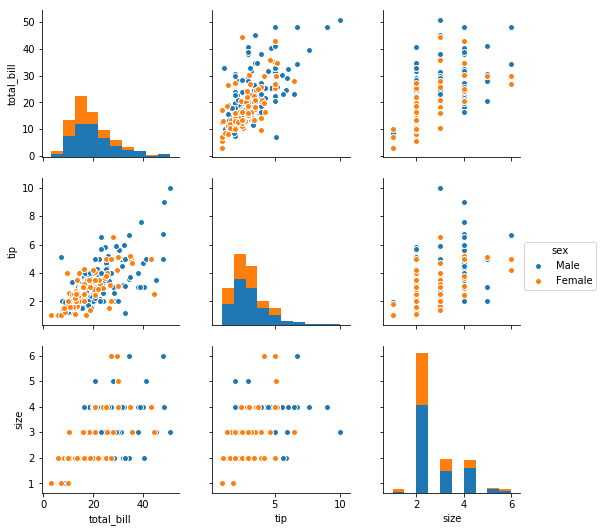

In [17]:
sns.pairplot(tips, hue='sex')

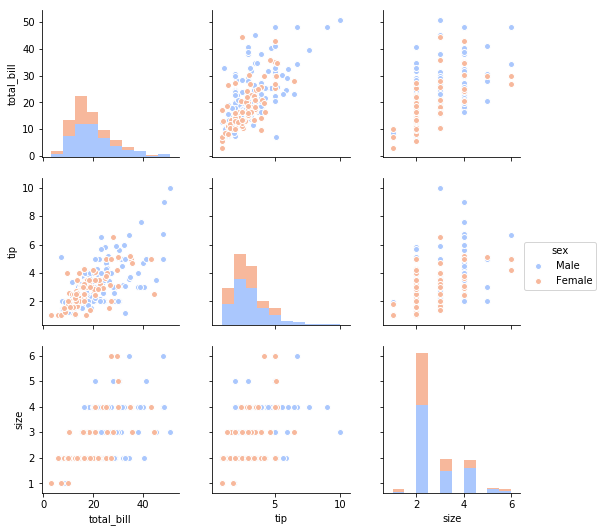

In [19]:
sns.pairplot(tips, hue='sex', palette='coolwarm')

# Rugplot

A rugplot draws a line for every point in the data column passed (alternative to `sns.distplot`)

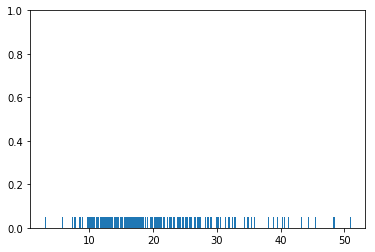

In [20]:
sns.rugplot(tips['total_bill'])

# KDE (Kernel Density Estimation Plots)

(0, 1)

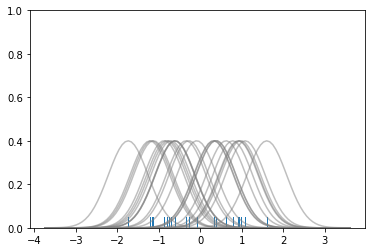

In [33]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Sum all the normal distributions to obtain a kde

Text(0.5,0.98,'Sum of the Basis Functions')

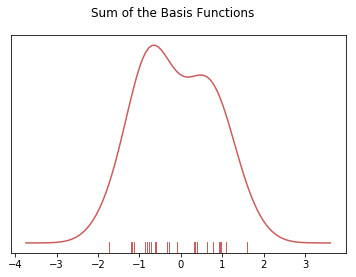

In [34]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

Or plot a **kde** plot directly with the `searborn`library

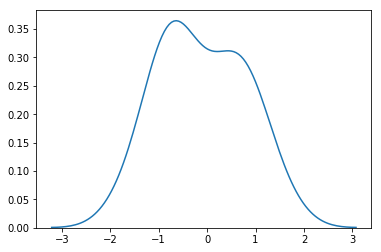

In [35]:
sns.kdeplot(dataset)

## Categorical Plots

### Bar plot

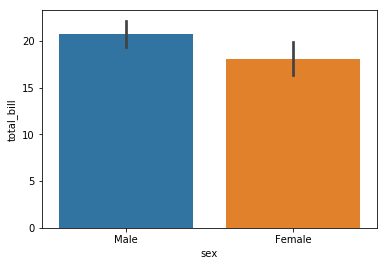

In [36]:
sns.barplot(x='sex',y='total_bill',data=tips)

The standard estimador on `sns.barplot` is the **average** per categorical group. We can instead pass a function that performs another estimate per category, such as numpy's **standard deviation**.

In [37]:
import numpy as np

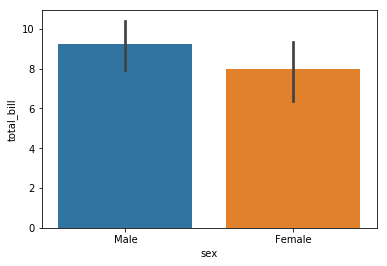

In [38]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

### Count plot

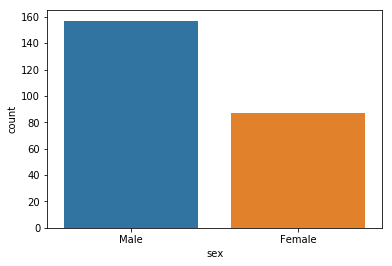

In [40]:
sns.countplot(x='sex',data=tips)

### Box plot

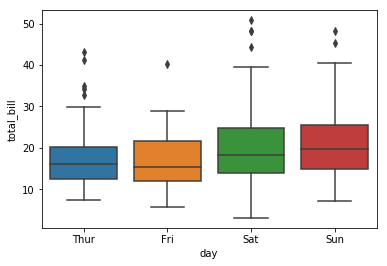

In [41]:
sns.boxplot(x='day',y='total_bill',data=tips)

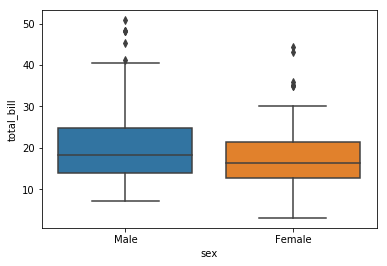

In [43]:

sns.boxplot(x='sex',y='total_bill',data=tips)

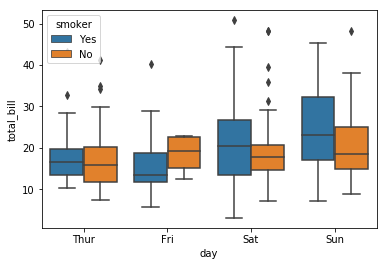

In [44]:
sns.boxplot(x='day',y='total_bill',data=tips, hue='smoker')

### Violin plot

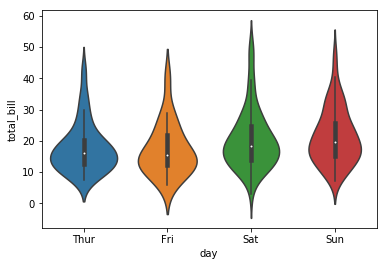

In [45]:
sns.violinplot(x='day',y='total_bill',data=tips)

Violin plot plots all data points in a category, giving a lot more information on the distribution of a variable

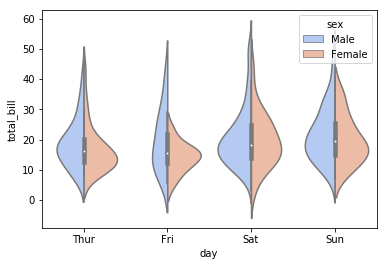

In [47]:
sns.violinplot(x='day',y='total_bill',data=tips, hue='sex',split=True,palette='coolwarm')

### Strip plot

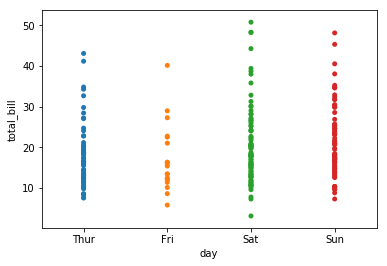

In [48]:
sns.stripplot(x='day',y='total_bill',data=tips)

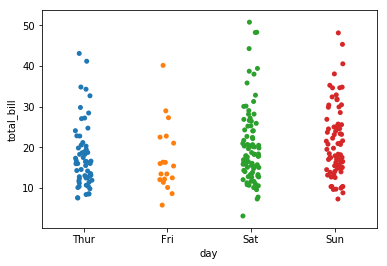

In [49]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True)

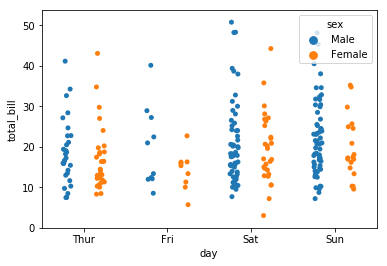

In [52]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex', dodge=True)

### Sawrmplot

Combining a violion and a strip plot, we get a swarmplot. The points here are adjusted so that they don't overlap

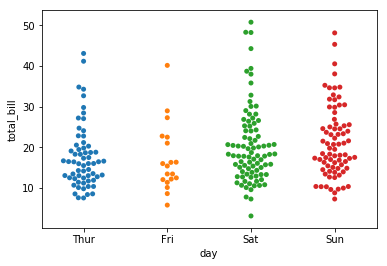

In [53]:
sns.swarmplot(x='day',y='total_bill',data=tips)

Combine swarmplot with a violinplot

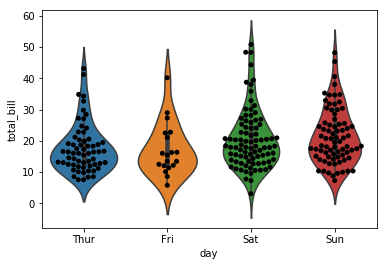

In [54]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

### Factor plot

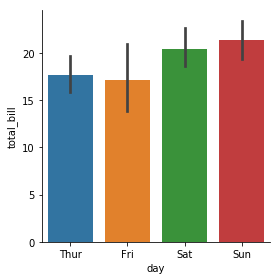

In [55]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

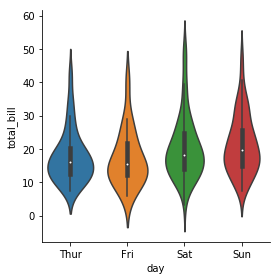

In [56]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='violin')

## Matrix Plots

In [57]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### Heatmaps

Transform values into a matrix-type where for each value is indexed by a variable.

In [61]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


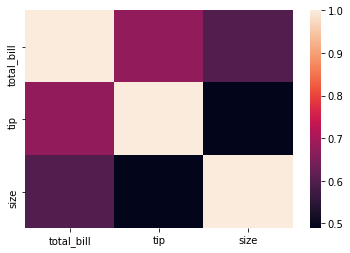

In [59]:
sns.heatmap(tips.corr())

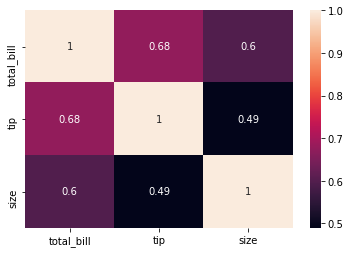

In [62]:
sns.heatmap(tips.corr(), annot=True)

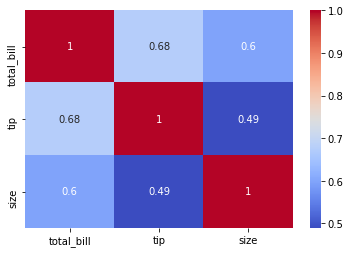

In [63]:
sns.heatmap(tips.corr(), annot=True, cmap='coolwarm')

In [65]:
fp = flights.pivot_table(index='month', columns='year',values='passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


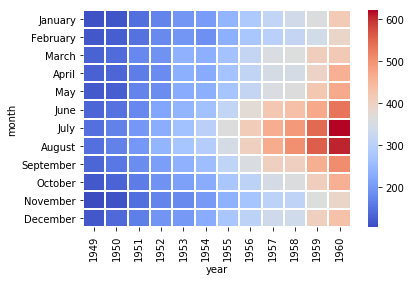

In [70]:
sns.heatmap(fp, cmap='coolwarm', linecolor='white', linewidths=1)

### Clustermaps

A heatmap that tries to cluster the variables together. 

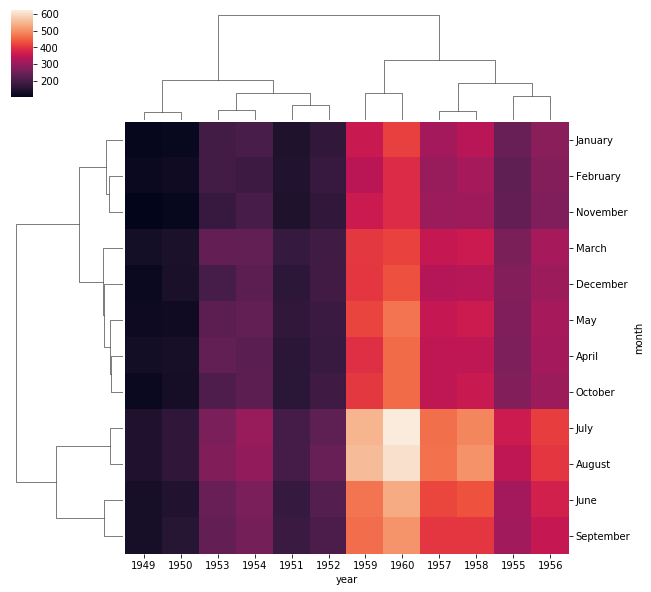

In [71]:
sns.clustermap(fp)

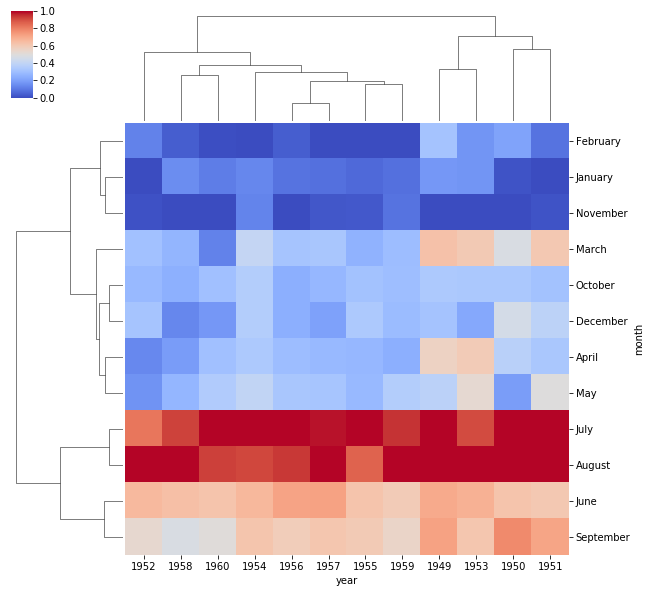

In [72]:
sns.clustermap(fp, cmap='coolwarm', standard_scale=1)

## Grids

In [73]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [74]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

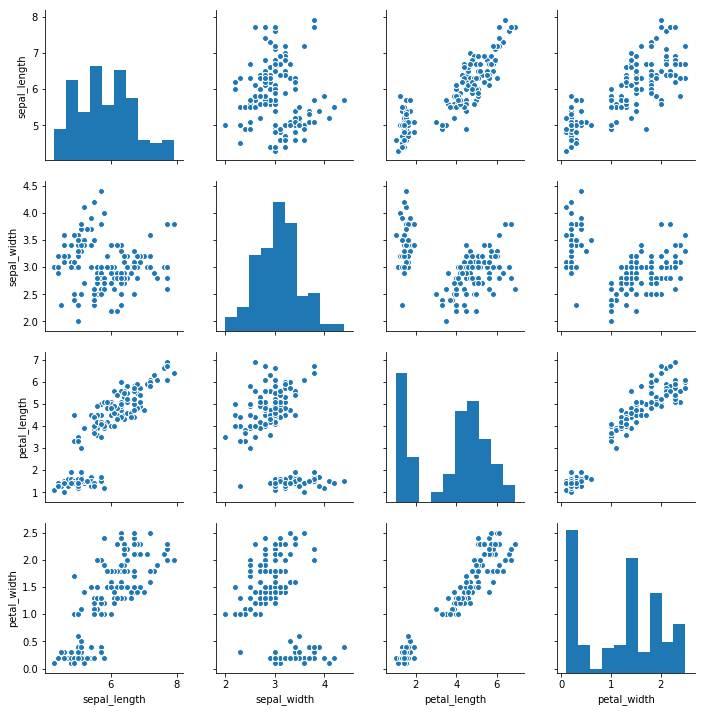

In [75]:
sns.pairplot(iris)

Grid allows for better control over pairplot -> **`sns.PairGrid` is a custom function of `sns.pairplot`**

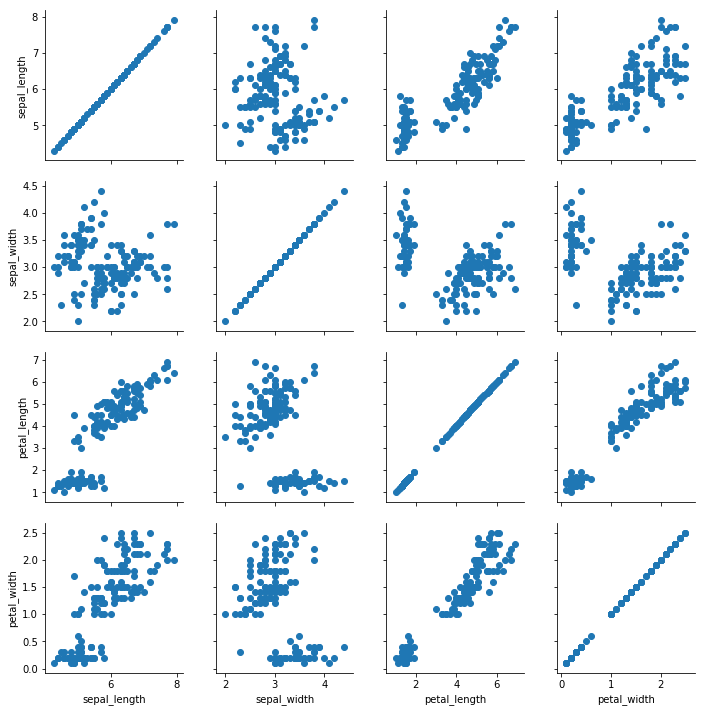

In [77]:
g = sns.PairGrid(iris)
g.map(plt.scatter)

C:\Users\TEMP\Documents\Miniconda3\envs\py3udemy\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


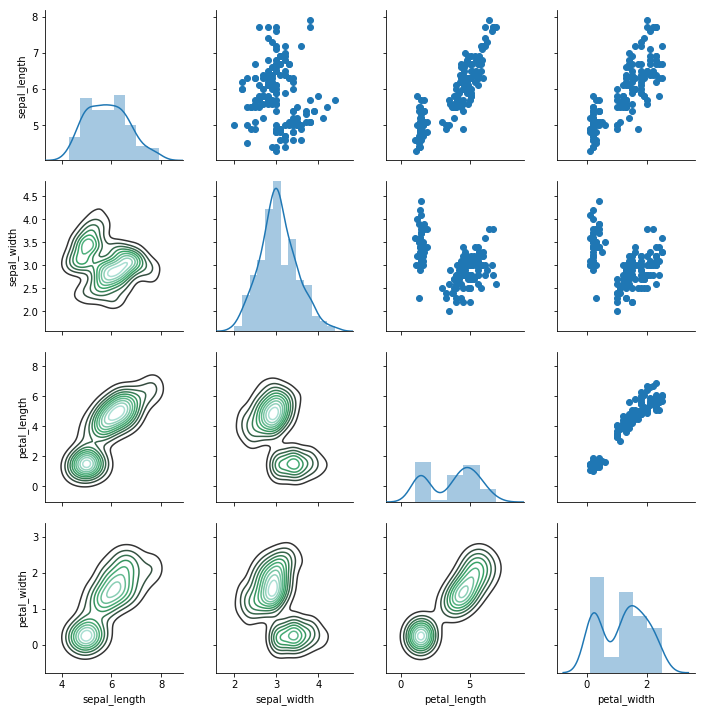

In [78]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

### Facet Grid

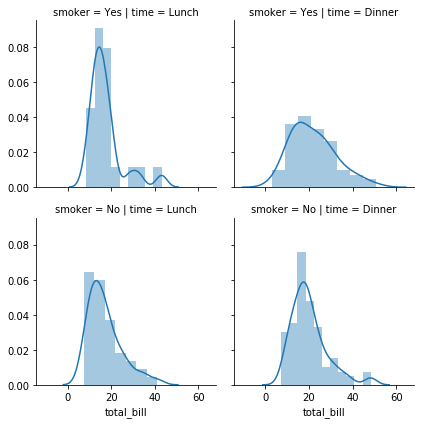

In [80]:
g = sns.FacetGrid(data=tips, col='time',row='smoker')
g.map(sns.distplot, 'total_bill')

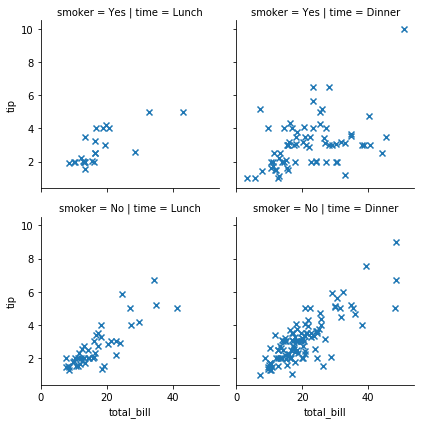

In [83]:
g = sns.FacetGrid(data=tips, col='time',row='smoker')
g.map(plt.scatter, 'total_bill','tip',marker='x')

## Regression Plots

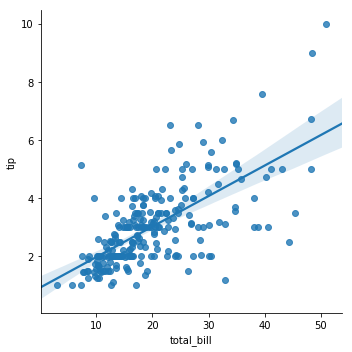

In [87]:
sns.lmplot(x='total_bill', y='tip', data=tips)

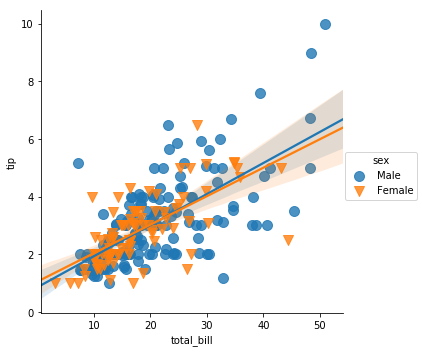

In [90]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o','v'], scatter_kws={'s':100})

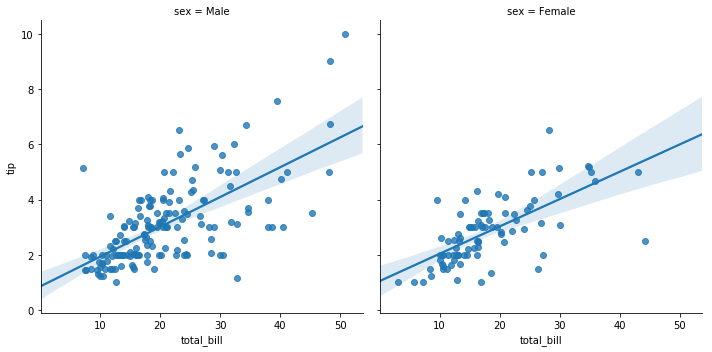

In [91]:
sns.lmplot(x='total_bill',y='tip',data=tips, col='sex')

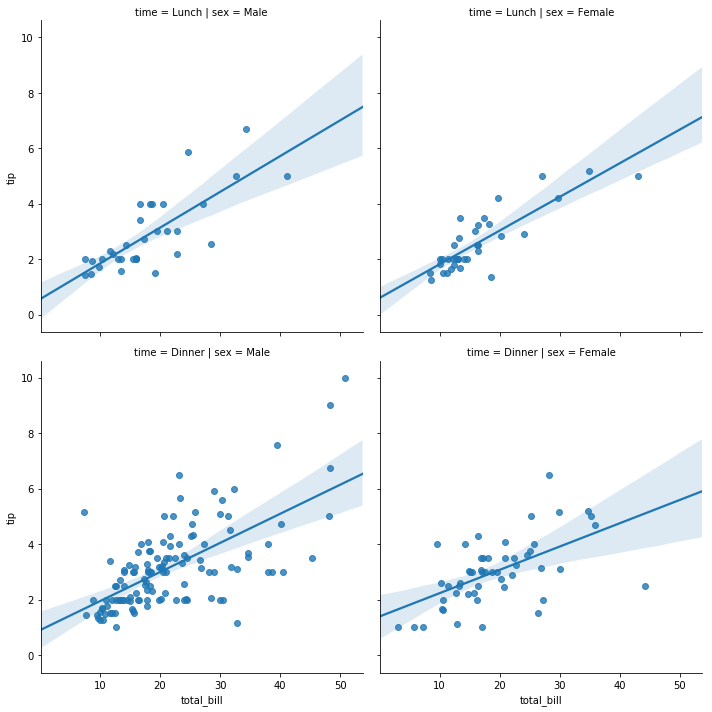

In [92]:
sns.lmplot(x='total_bill',y='tip',data=tips, col='sex',row='time')

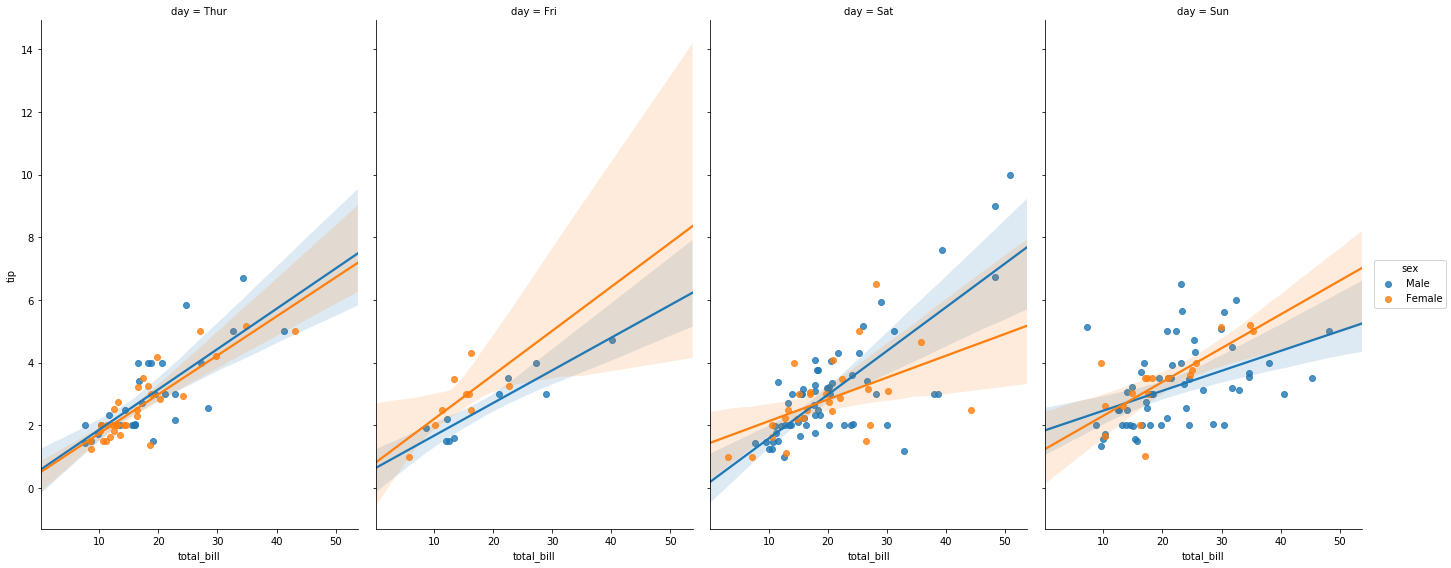

In [94]:
sns.lmplot(x='total_bill',y='tip',data=tips, col='day',hue='sex',
          aspect=0.6, size=8)

## Style and Color

### Set the style

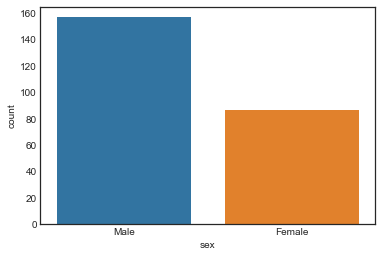

In [97]:
sns.set_style('white')
sns.countplot(x='sex', data=tips)

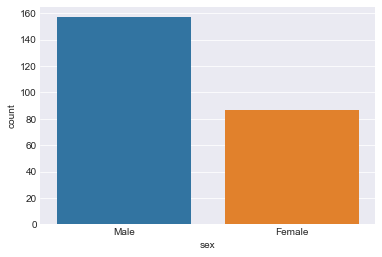

In [100]:
sns.set_style('darkgrid')
sns.countplot(x='sex', data=tips)

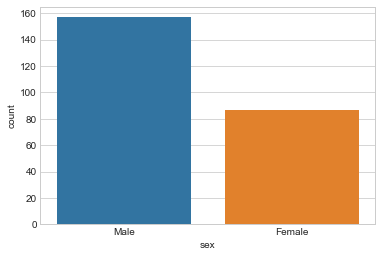

In [99]:
sns.set_style('whitegrid')
sns.countplot(x='sex', data=tips)

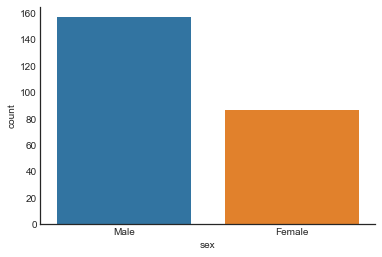

In [102]:
sns.set_style('white')
sns.countplot(x='sex', data=tips)
sns.despine()

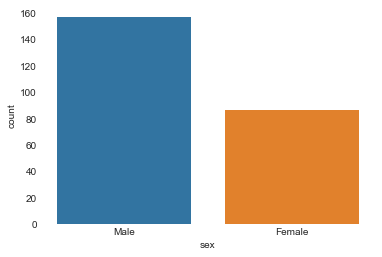

In [103]:
sns.set_style('white')
sns.countplot(x='sex', data=tips)
sns.despine(left=True, bottom=True)

### Size and Aspect

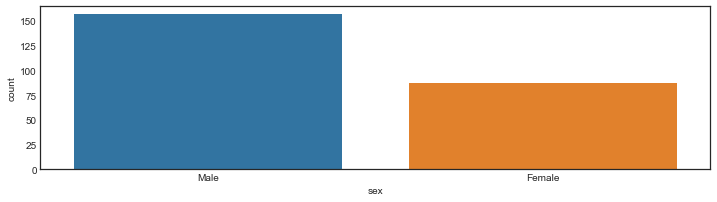

In [105]:
plt.figure(figsize=(12,3)) #use matplotlib notation
sns.countplot(x='sex',data=tips)

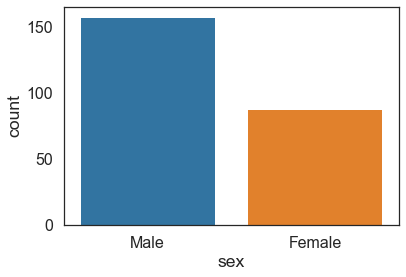

In [108]:
sns.set_context(context='poster', font_scale=1)
sns.countplot(x='sex',data=tips)

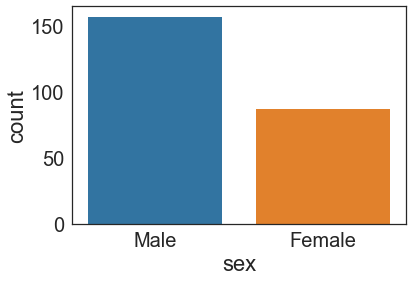

In [109]:
sns.set_context(context='notebook', font_scale=2)
sns.countplot(x='sex',data=tips)

### Color

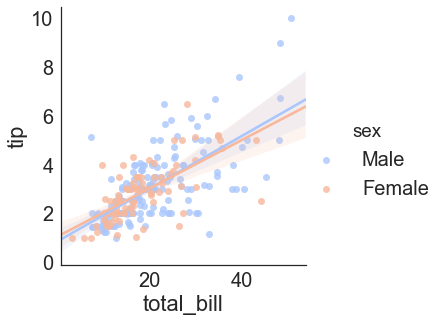

In [110]:
sns.lmplot(x='total_bill',y='tip',data=tips, hue='sex', palette='coolwarm')

More maps at https://matplotlib.org/examples/color/colormaps_reference.html

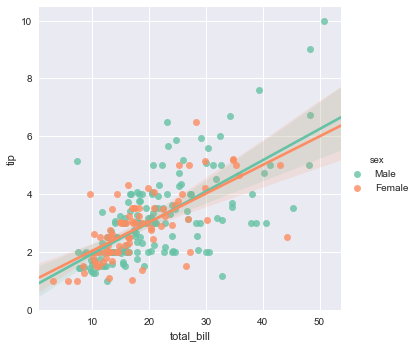

In [114]:
sns.set()
sns.lmplot(x='total_bill',y='tip',data=tips, hue='sex', palette='Set2')

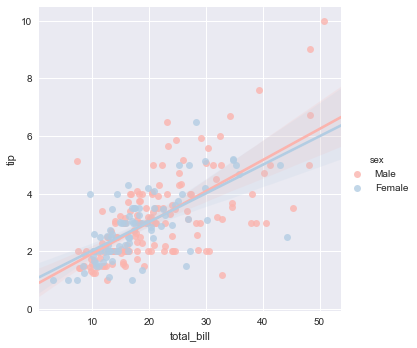

In [115]:
sns.lmplot(x='total_bill',y='tip',data=tips, hue='sex', palette='Pastel1')